In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

breastcancer = '/Users/sanidhya/Downloads/breastcancer.csv'
df = pd.read_csv(breastcancer, delimiter=';')

# Remove the 'id' column as it is not useful for prediction, to simplify the dataset
df = df.drop(["id"], axis=1)

# Reduce the dataframe size by sampling 1/3 of the data
df = df.sample(frac=1/3, random_state=1)  # random_state for reproducibility

# Separate the dataset into features (X) and target label (y)
y = df['diagnosis']  # Target label: diagnosis
X = df.drop('diagnosis', axis=1)  # Features: all other columns

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [3]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [6]:
y

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [18]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [19]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

In [20]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset:     0.92


In [21]:
from qiskit.circuit.library import ZZFeatureMap

num_features = X.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

ValueError: Image size of 1810x137322 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1810.93x137323 with 1 Axes>

In [4]:
import pandas as pd
import seaborn as sns

df_new = pd.DataFrame(X)
df_new["class"] = y

In [12]:
len(df_new)

190

In [13]:
df_new['class']

421    0
47     1
292    0
186    1
414    1
      ..
18     1
168    1
361    0
121    1
315    0
Name: class, Length: 190, dtype: int64

In [5]:
df_new.head

<bound method NDFrame.head of             0         1         2         3         4         5         6  \
0    0.380898  0.153649  0.393536  0.243342  0.469146  0.497453  0.386255   
1    0.305796  0.353393  0.305039  0.185663  0.640259  0.309542  0.326585   
2    0.294926  0.240717  0.284506  0.175742  0.434115  0.173904  0.163958   
3    0.559761  0.349979  0.540886  0.426062  0.237133  0.190210  0.217608   
4    0.402638  0.829279  0.382619  0.273439  0.201024  0.070226  0.124827   
..        ...       ...       ...       ...       ...       ...       ...   
185  0.633875  0.502347  0.623310  0.530026  0.404608  0.246180  0.393980   
186  0.518257  0.610329  0.522811  0.399288  0.493398  0.425084  0.575120   
187  0.312219  0.477593  0.299689  0.191123  0.236324  0.125140  0.089078   
188  0.577054  0.287665  0.561131  0.443152  0.500135  0.268853  0.388119   
189  0.272197  0.276142  0.255947  0.160503  0.226758  0.046279  0.011915   

            7         8         9  ...       

<AxesSubplot: >

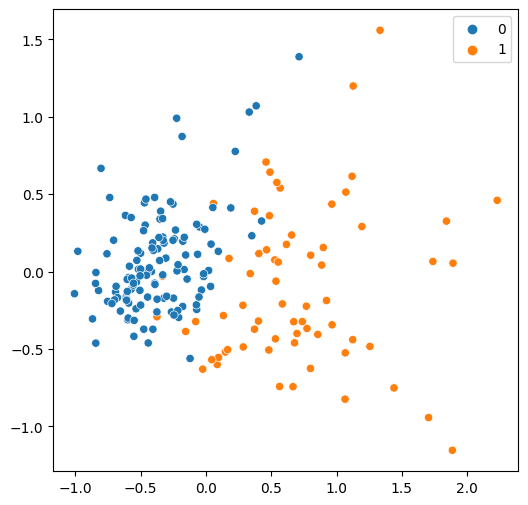

In [6]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

features = PCA(n_components=2).fit_transform(X)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=y, palette="tab10")

In [7]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals
from sklearn.svm import SVC

train_features, test_features, train_labels, test_labels = train_test_split(
    features, y, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc = SVC()

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.95
Classical SVC on the test dataset:     0.97


In [8]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

In [10]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=40)

In [11]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [12]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

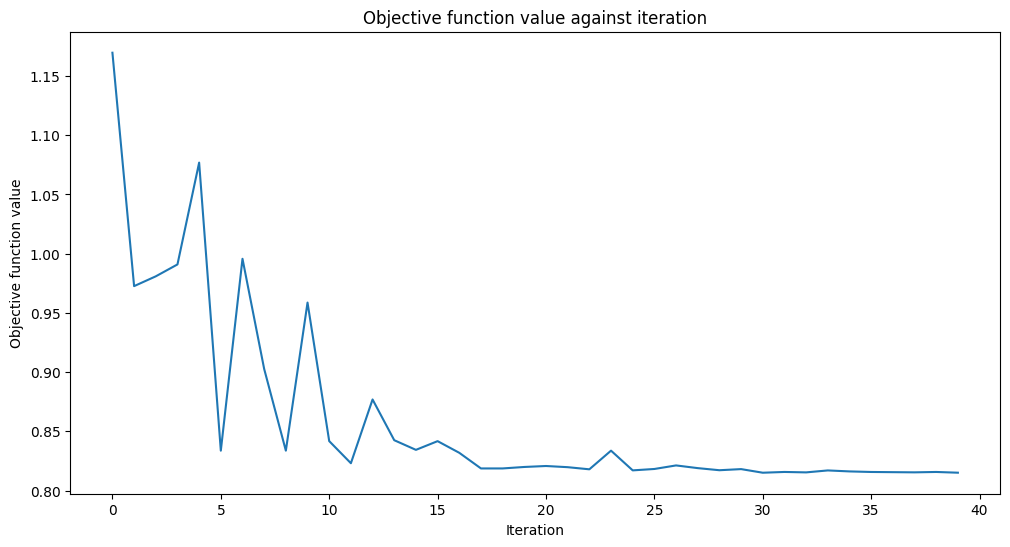

Training time: 19 seconds


In [13]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [14]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.71
Quantum VQC on the test dataset using RealAmplitudes:     0.68


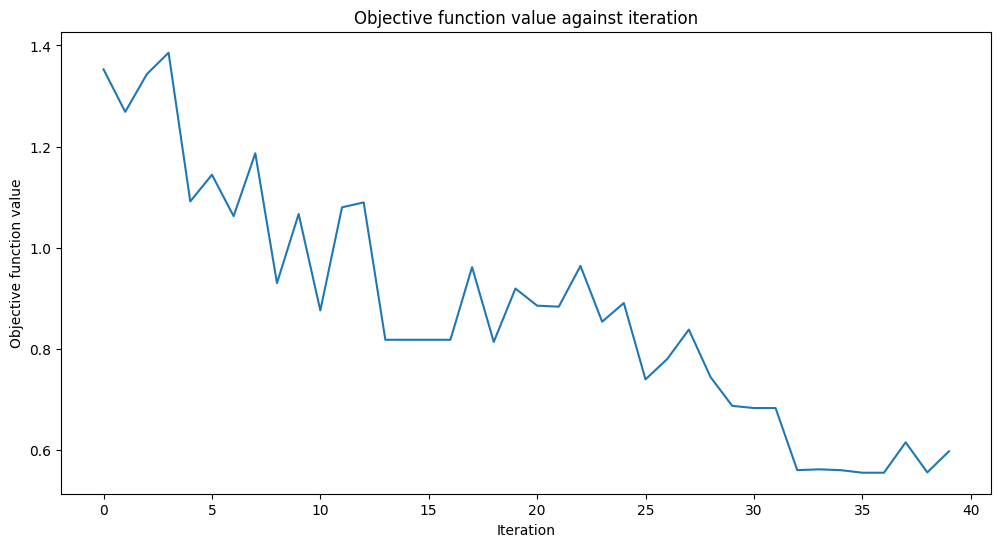

Training time: 24 seconds


In [15]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [16]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.82
Quantum VQC on the test dataset using EfficientSU2:     0.82


In [22]:
print(f"Model                           | Train Score | Test Score")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
# print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
# print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:10.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")

Model                           | Train Score | Test Score
SVC, 4 features                 |       0.99 |       0.92
SVC, 2 features                 |       0.95 |       0.97
VQC, 2 features, RealAmplitudes |       0.71 |       0.68
VQC, 2 features, EfficientSU2   |       0.82 |       0.82
